In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression 
import pylab as plt 
%matplotlib inline 
from sklearn import linear_model
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',header=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.replace(" ", np.nan, inplace = True)
df.dropna(subset=["TotalCharges"], axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)
cleanup_nums = {"PhoneService": {"Yes": 1, "No": 0}, "PaperlessBilling": {"Yes": 1, "No": 0}, "Churn": {"Yes": 1, "No": 0}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"MultipleLines": {"Yes": 1, "No": 0, "No phone service": 2}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"InternetService": {"Fiber optic": 1, "DSL": 2, "No": 0}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"OnlineSecurity": {"Yes": 1, "No": 0, "No internet service": 2}, "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": 2}, "TechSupport": {"Yes": 1, "No": 0, "No internet service": 2}, "StreamingTV": {"Yes": 1, "No": 0, "No internet service": 2}, "StreamingMovies": {"Yes": 1, "No": 0, "No internet service": 2}, "Contract": {"Month-to-month": 1, "Two year": 3, "One year": 2}, "PaymentMethod": {"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"OnlineBackup": {"Yes": 1, "No": 0, "No internet service": 2}}
df.replace(cleanup_nums, inplace=True)
cleanup_nums = {"gender": {"Male": 1, "Female": 0}, "Partner": {"Yes": 1, "No": 0}, "Dependents": {"Yes": 1, "No": 0}}
df.replace(cleanup_nums, inplace=True)

In [3]:
df = df.drop('customerID', axis = 1)
print (df)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
5          0              0        0           0       8             1   
6          1              0        0           1      22             1   
7          0              0        0           0      10             0   
8          0              0        1           0      28             1   
9          1              0        0           1      62             1   
10         1              0        1           1      13             1   
11         1              0        0           0      16             1   
12         1              0        1  

In [11]:
X = np.asarray(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]])
Y = np.asarray(df['Churn'])

from  sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, yhat)

C:\Users\Peñaranda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.80597014925373134

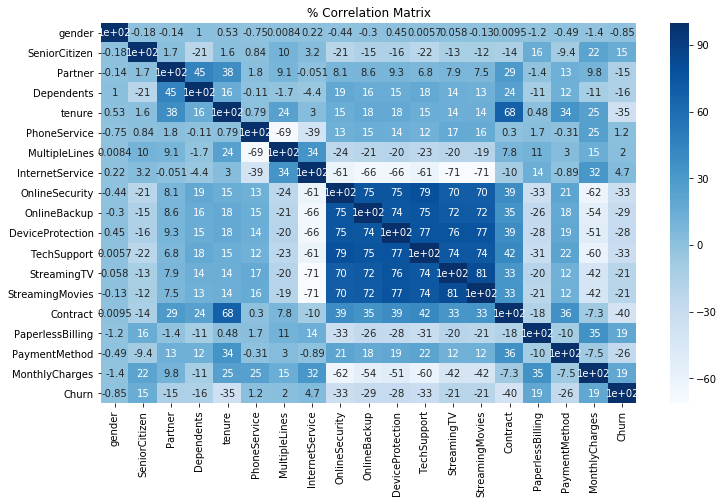

In [10]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(cbar=True,annot=True,data=df.corr()*100,cmap='Blues')
plt.title('% Correlation Matrix')
plt.show()

In [6]:
yhat_prob

array([[ 0.87519838,  0.12480162],
       [ 0.73033803,  0.26966197],
       [ 0.9482254 ,  0.0517746 ],
       ..., 
       [ 0.96919214,  0.03080786],
       [ 0.41714802,  0.58285198],
       [ 0.36411497,  0.63588503]])

In [7]:
prob_churn = yhat_prob[:,1]

In [8]:
indexes_churn =  [x for x in range(len(prob_churn)) if (prob_churn[x] > 0.4) and (prob_churn[x] < 0.6)]

In [9]:
indexes_churn

[4,
 15,
 22,
 25,
 36,
 44,
 46,
 64,
 70,
 71,
 73,
 92,
 94,
 100,
 101,
 102,
 106,
 110,
 114,
 131,
 136,
 139,
 144,
 147,
 155,
 164,
 169,
 180,
 181,
 186,
 189,
 193,
 195,
 202,
 214,
 215,
 221,
 223,
 228,
 229,
 240,
 242,
 245,
 247,
 250,
 253,
 254,
 262,
 279,
 285,
 296,
 298,
 299,
 312,
 313,
 314,
 320,
 321,
 340,
 342,
 350,
 355,
 356,
 363,
 366,
 373,
 374,
 378,
 379,
 380,
 385,
 399,
 401,
 409,
 412,
 424,
 426,
 427,
 432,
 435,
 438,
 440,
 452,
 456,
 459,
 462,
 465,
 467,
 489,
 491,
 494,
 501,
 505,
 511,
 522,
 523,
 524,
 531,
 540,
 545,
 551,
 555,
 561,
 562,
 564,
 565,
 566,
 567,
 571,
 575,
 576,
 582,
 592,
 616,
 627,
 635,
 647,
 661,
 662,
 663,
 666,
 674,
 679,
 682,
 687,
 689,
 696,
 697,
 702,
 704,
 707,
 716,
 724,
 730,
 735,
 739,
 740,
 744,
 746,
 749,
 752,
 753,
 755,
 760,
 762,
 768,
 770,
 772,
 774,
 778,
 789,
 791,
 798,
 809,
 810,
 813,
 822,
 827,
 832,
 833,
 834,
 842,
 843,
 860,
 868,
 871,
 893,
 895,
 896,


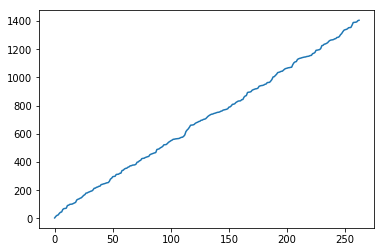

In [16]:
plt.plot ( indexes_churn)